Enter the year 2020
Valid input


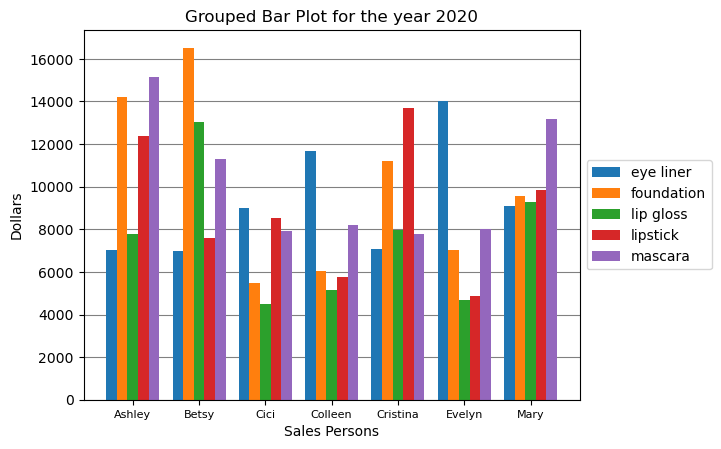

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime
import sys
from warnings import filterwarnings
#import re
filterwarnings('ignore')
pd.set_option('display.max_column', None)
data=pd.read_excel('D:/Upwork/MakeUP_IVY/Makeup_IVY 4 Python.xlsm',sheet_name='Sheet1')
data["Date"]=pd.to_datetime(data["Date"]).dt.strftime("%d-%m-%Y")
data["Year"]=pd.DatetimeIndex(data['Date']).year
x=input("Enter the year ")
if x not in ['2004','2005','2006','2020','2021','2022']:
    print("Invalid input")
    sys.exit()
else:
    print("Valid input")
    d_X=data[data.Year==int(x)]
    #fig,ax=plt.subplots(figsize=(15,15))
    k=d_X.groupby(['Name','Product'])
    d_X_total=k['Total']
    d1=(d_X_total.agg('sum').round(0).unstack())
    #d1=d1.reset_index()
    #d1.plot(x="Name",kind='bar', stacked=False,title='Sales by each person')
    dict1=d1.to_dict('list')
    persons=list(d1.index)
    bar_width=0.16
    x_pos=np.arange(len(persons))
    fig,ax=plt.subplots()
    for i, (pr_od,sls) in enumerate(dict1.items()):
        # Calculate the x-axis position for the current group of bars
        pos=x_pos+(i*bar_width)
        #Create a set of bars for the current group
        rects=ax.bar(pos,sls,width=bar_width,label=pr_od)
        #ax.bar_label(rects,padding=3,fontsize=6,rotation=-90)
    ax.set_xticks(x_pos+((len(dict1)-1)/2)*bar_width)
    ax.set_xticklabels(persons, fontsize=8)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel('Sales Persons')
    ax.set_ylabel('Dollars')
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='-')
    ax.set_title('Grouped Bar Plot for the year ' + x)
    plt.show()   
